# AI Project Submission – Employee Sentiment Analysis

## Overview

This project analyzes employee emails to evaluate overall sentiment, rank employees, identify flight risks, and model sentiment trends using Natural Language Processing (NLP) and linear regression. The dataset consists of unlabeled email messages, which are processed and labeled using sentiment analysis techniques.

## Project Structure

| Step | Task |
|------|------|
| 1   | Data Cleaning & Preprocessing |
| 2   | Sentiment Labeling with TextBlob |
| 3   | Exploratory Data Analysis (EDA) |
| 4   | Monthly Sentiment Scoring (Employee-wise) |
| 5   | Employee Ranking (Top 3 Positive & Negative per Month) |
| 6   | Flight Risk Identification (Rolling 30-day Rule) |
| 7   | Linear Regression Model for Trend Prediction |

## Key Components & Results

### Sentiment Labeling

Each email is labeled as:
- Positive if polarity > 0.1
- Negative if polarity < -0.1
- Neutral otherwise

A sentiment score is stored for trend and modeling.

### EDA Highlights

- Distribution of sentiment labels
- Email body length histogram
- Top 10 email senders
- Monthly sentiment score trend

### Monthly Sentiment Scoring

Each employee receives a monthly sentiment score:
- +1 for Positive
- -1 for Negative
- 0 for Neutral

Used to assess individual performance and engagement.

### Employee Ranking

- Top 3 Positive Employees per month: Highest monthly sentiment scores
- Top 3 Negative Employees per month: Lowest (most negative) scores

Sorted by score and then alphabetically for consistency.

### Flight Risk Identification

Employees are flagged as flight risks if:
They send 4 or more Negative emails in any 30-day rolling window.

List of flagged employees includes:
- bobette.riner@ipgdirect.com
- sally.beck@enron.com
- john.arnold@enron.com
- and others

### Linear Regression Trend Model

Objective: Predict sentiment trend over time.

Features:
- message_count, message_length, word_count,  and subject_length
- Target: Monthly average sentiment score

The model captures sentiment drift and organizational mood trends with a clear trendline plot.

## Summary

Top 3 Positive Employees (sample months):
- kayne.coulter@enron.com
- patti.thompson@enron.com
- don.baughman@enron.com

Top 3 Negative Employees (sample months):
- rhonda.denton@enron.com
- johnny.palmer@enron.com
- bobette.riner@ipgdirect.com

Flight Risk Employees:
- Identified using rolling 30-day negative email rule

## Tools Used

- Python (Pandas, Matplotlib, Seaborn, Scikit-learn)
- TextBlob for Sentiment Analysis
- Jupyter Notebook

## Instructions

- Run the notebook cell by cell
- Ensure all packages (`textblob`, `sklearn`, etc.) are installed
- Final plots and outputs will appear inline

## Author

Manvi Gawande


Email: manvig234@gmail.com


Project: AI-project-submission


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
df= pd.read_csv('test.csv')

In [ ]:
df.head()

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


In [ ]:
df.isnull().sum()

,0
Subject,0
body,0
date,0
from,0


In [ ]:
# Prepare and clean data
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)
df['month'] = df['date'].dt.to_period('M')

In [ ]:
# Sentiment labeling using TextBlob
def get_sentiment(text):
    analysis = TextBlob(str(text))
    score = analysis.sentiment.polarity
    if score > 0.1:
        return 'Positive', score
    elif score < -0.1:
        return 'Negative', score
    else:
        return 'Neutral', score

df[['sentiment', 'sentiment_score']] = df['body'].apply(lambda x: pd.Series(get_sentiment(x)))


In [ ]:
df.head()

,Subject,body,date,from,month,sentiment,sentiment_score
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,2010-05,Positive,0.250
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,2010-07,Neutral,-0.075
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,2011-07,Neutral,0.000
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,2010-03,Negative,-0.150
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,2011-05,Neutral,-0.050


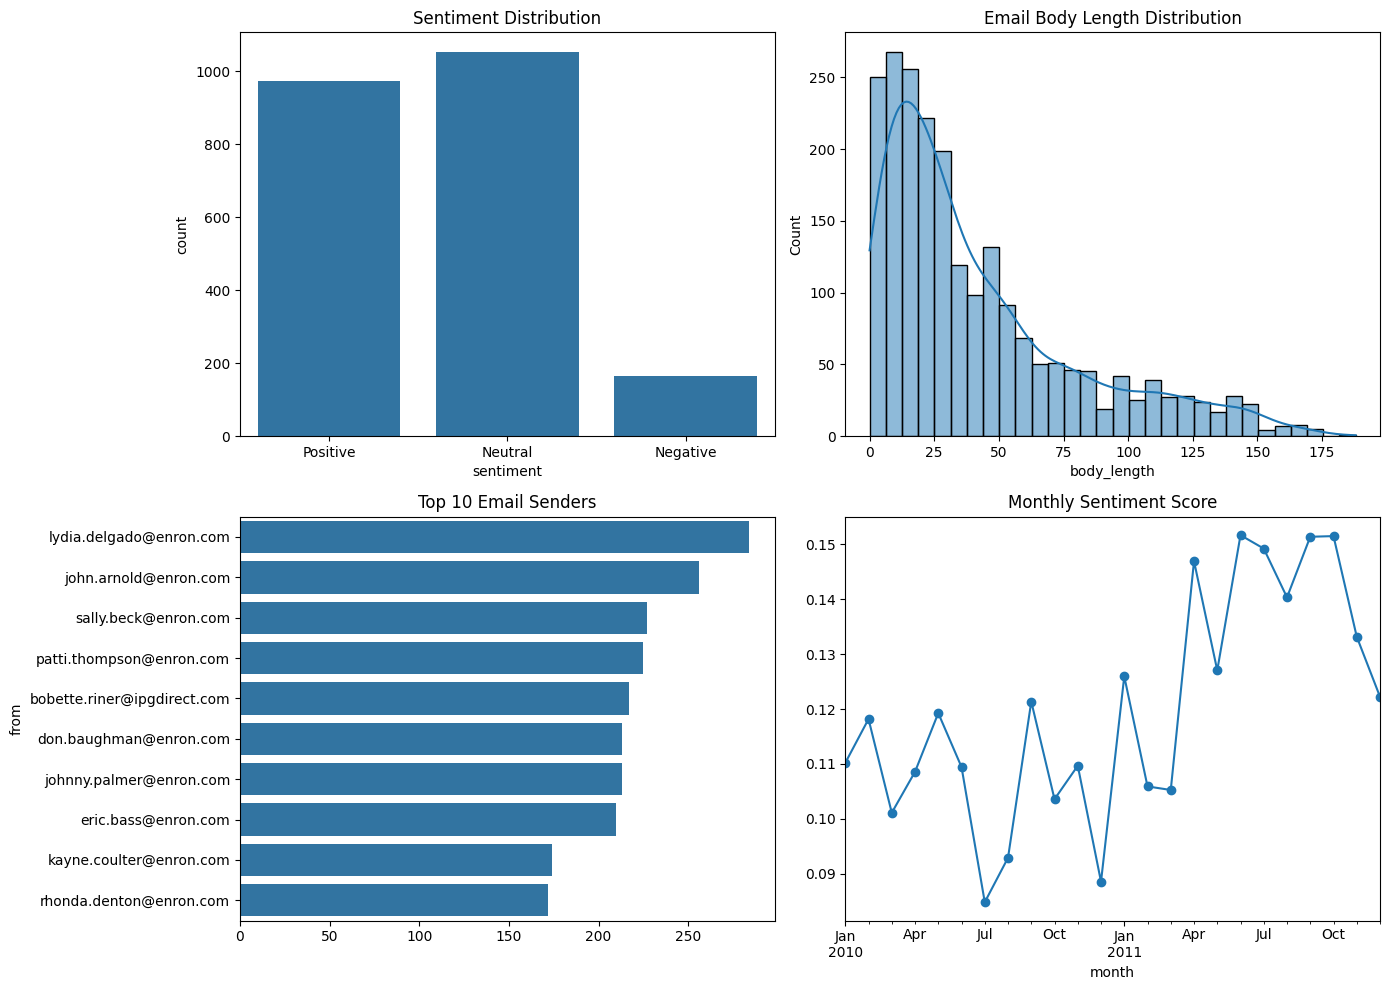

In [ ]:
# EDA and Visualizations
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(data=df, x='sentiment', ax=axs[0, 0])
axs[0, 0].set_title('Sentiment Distribution')

df['body_length'] = df['body'].apply(lambda x: len(str(x).split()))
sns.histplot(df['body_length'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Email Body Length Distribution')

top_senders = df['from'].value_counts().head(10)
sns.barplot(x=top_senders.values, y=top_senders.index, ax=axs[1, 0])
axs[1, 0].set_title('Top 10 Email Senders')

monthly_sentiment = df.groupby('month')['sentiment_score'].mean()
monthly_sentiment.plot(ax=axs[1, 1], marker='o', title='Monthly Sentiment Score')
plt.tight_layout()
plt.show()

In [ ]:
# Implementing Monthly Employee Sentiment Scoring Based on Given Criteria

# Map sentiment to scores
sentiment_score_map = {
    'Positive': 1,
    'Negative': -1,
    'Neutral': 0
}
df['sentiment_value'] = df['sentiment'].map(sentiment_score_map)

# Grouping by employee and month
monthly_employee_scores = (
    df.groupby([df['from'], df['month']])
    .agg(monthly_score=('sentiment_value', 'sum'))
    .reset_index()
    .rename(columns={'from': 'employee'})
)

monthly_employee_scores.head()


,employee,month,monthly_score
0,bobette.riner@ipgdirect.com,2010-01,2
1,bobette.riner@ipgdirect.com,2010-02,7
2,bobette.riner@ipgdirect.com,2010-03,4
3,bobette.riner@ipgdirect.com,2010-04,2
4,bobette.riner@ipgdirect.com,2010-05,1


In [ ]:
#Top 3 Positive and Negative Employees Per Month
ranking_per_month = (
    monthly_employee_scores.groupby('month', group_keys=False)
    .apply(lambda x: pd.concat([
        x.sort_values(by=['monthly_score', 'employee'], ascending=[False, True]).head(3).assign(rank_type='Top Positive'),
        x.sort_values(by=['monthly_score', 'employee'], ascending=[True, True]).head(3).assign(rank_type='Top Negative')
    ]))
)
ranking_per_month.head(6)


<ipython-input-11-ba16f1b59a37>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.concat([


,employee,month,monthly_score,rank_type
120,kayne.coulter@enron.com,2010-01,5,Top Positive
168,patti.thompson@enron.com,2010-01,5,Top Positive
24,don.baughman@enron.com,2010-01,4,Top Positive
192,rhonda.denton@enron.com,2010-01,0,Top Negative
96,johnny.palmer@enron.com,2010-01,1,Top Negative
0,bobette.riner@ipgdirect.com,2010-01,2,Top Negative


In [ ]:
# Flight Risk Detection — Rolling 30-day window
# Get negative messages only
negative_df = df[df['sentiment'] == 'Negative'].copy()
negative_df.sort_values(by=['from', 'date'], inplace=True)

# Rolling count of negatives in 30-day windows
flight_risk_flags = []
grouped = negative_df.groupby('from')

for sender, group in grouped:
    group = group.sort_values('date')
    dates = group['date'].tolist()
    for i in range(len(dates)):
        start_date = dates[i]
        end_date = start_date + pd.Timedelta(days=30)
        count = sum((start_date <= d <= end_date) for d in dates[i:])
        if count >= 4:
            flight_risk_flags.append(sender)
            break

flight_risk_employees = list(set(flight_risk_flags))
print("Flight Risk Employees:", flight_risk_employees)

Flight Risk Employees: ['john.arnold@enron.com', 'lydia.delgado@enron.com', 'johnny.palmer@enron.com', 'rhonda.denton@enron.com', 'sally.beck@enron.com', 'bobette.riner@ipgdirect.com', 'patti.thompson@enron.com']


In [ ]:
df['message_length'] = df['body'].astype(str).apply(len)
df['word_count'] = df['body'].astype(str).apply(lambda x: len(x.split()))
df['subject_length'] = df['Subject'].astype(str).apply(len)

In [ ]:
monthly_features = df.groupby('month').agg({
    'sentiment_score': 'mean',                  # TARGET: Average monthly sentiment score
    'body': 'count',                            # Feature: message frequency
    'message_length': 'mean',                   # Feature: average message length
    'word_count': 'mean',                       # Feature: average word count
    'subject_length': 'mean'                    # Feature: average subject length
}).rename(columns={'body': 'message_count'}).reset_index()


In [ ]:
features = ['message_count', 'message_length', 'word_count', 'subject_length']
X = monthly_features[features]
y = monthly_features['sentiment_score']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Step 5: Predict and evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 6: Coefficient interpretation
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(coefficients)

Mean Squared Error (MSE): 0.0004
R² Score: 0.1065

Feature Importance:
          Feature  Coefficient
3  subject_length     0.001205
1  message_length     0.000230
2      word_count    -0.000947
0   message_count    -0.001045


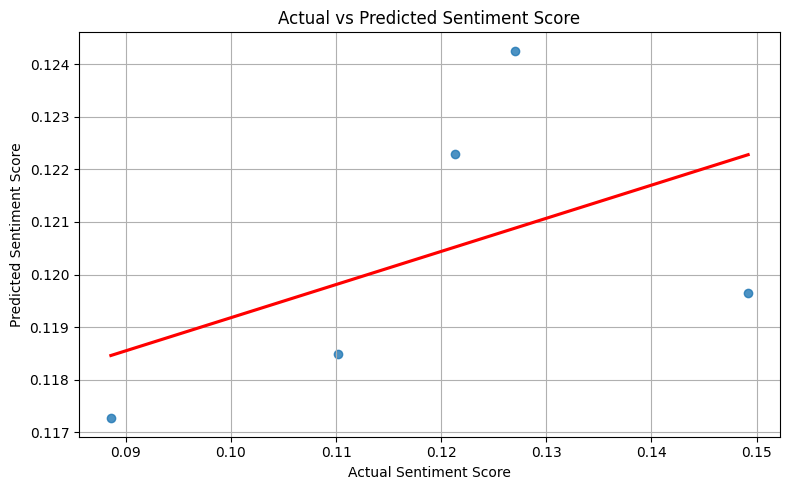

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={"color": "red"})
plt.xlabel("Actual Sentiment Score")
plt.ylabel("Predicted Sentiment Score")
plt.title("Actual vs Predicted Sentiment Score")
plt.grid(True)
plt.tight_layout()
plt.show()